In [1]:
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt 
import pylab as plt
import imageio
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_pdf import PdfPages
import string 
from os import listdir
from os.path import isfile, join, exists
from glob import glob
import os 
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [6]:
use_synthetic = True
if use_synthetic == True: 
    data_dir = "../logging_dir/tsne"
    emb_data_dir = "VGG_normal_extreme_extreme"
    #emb_data_dir = "VGG_normal_normal_pretrain"
    emb_type = "model_rep"
    data_file = f'{data_dir}/{emb_data_dir}/{emb_type}_tsne_data.csv'
else: 
    data_dir = "../logging_dir/pubfig83"
    emb_data_dir = "VGG_pretrain"
    emb_type = "model_rep"
    data_file = f'{data_dir}/{emb_data_dir}/{emb_type}_tsne_data.csv'

emb_df = pd.read_csv(data_file)
emb_df.head(3)

,Unnamed: 0,emb1,emb2,id,filename
0,0,-9.810675,-2.317578,806,/Users/kcollins/invariant_face_data/illum_data...
1,1,-11.426921,-2.855134,889,/Users/kcollins/invariant_face_data/illum_data...
2,2,3.761614,-6.858463,806,/Users/kcollins/invariant_face_data/illum_data...


<IPython.core.display.Javascript object>


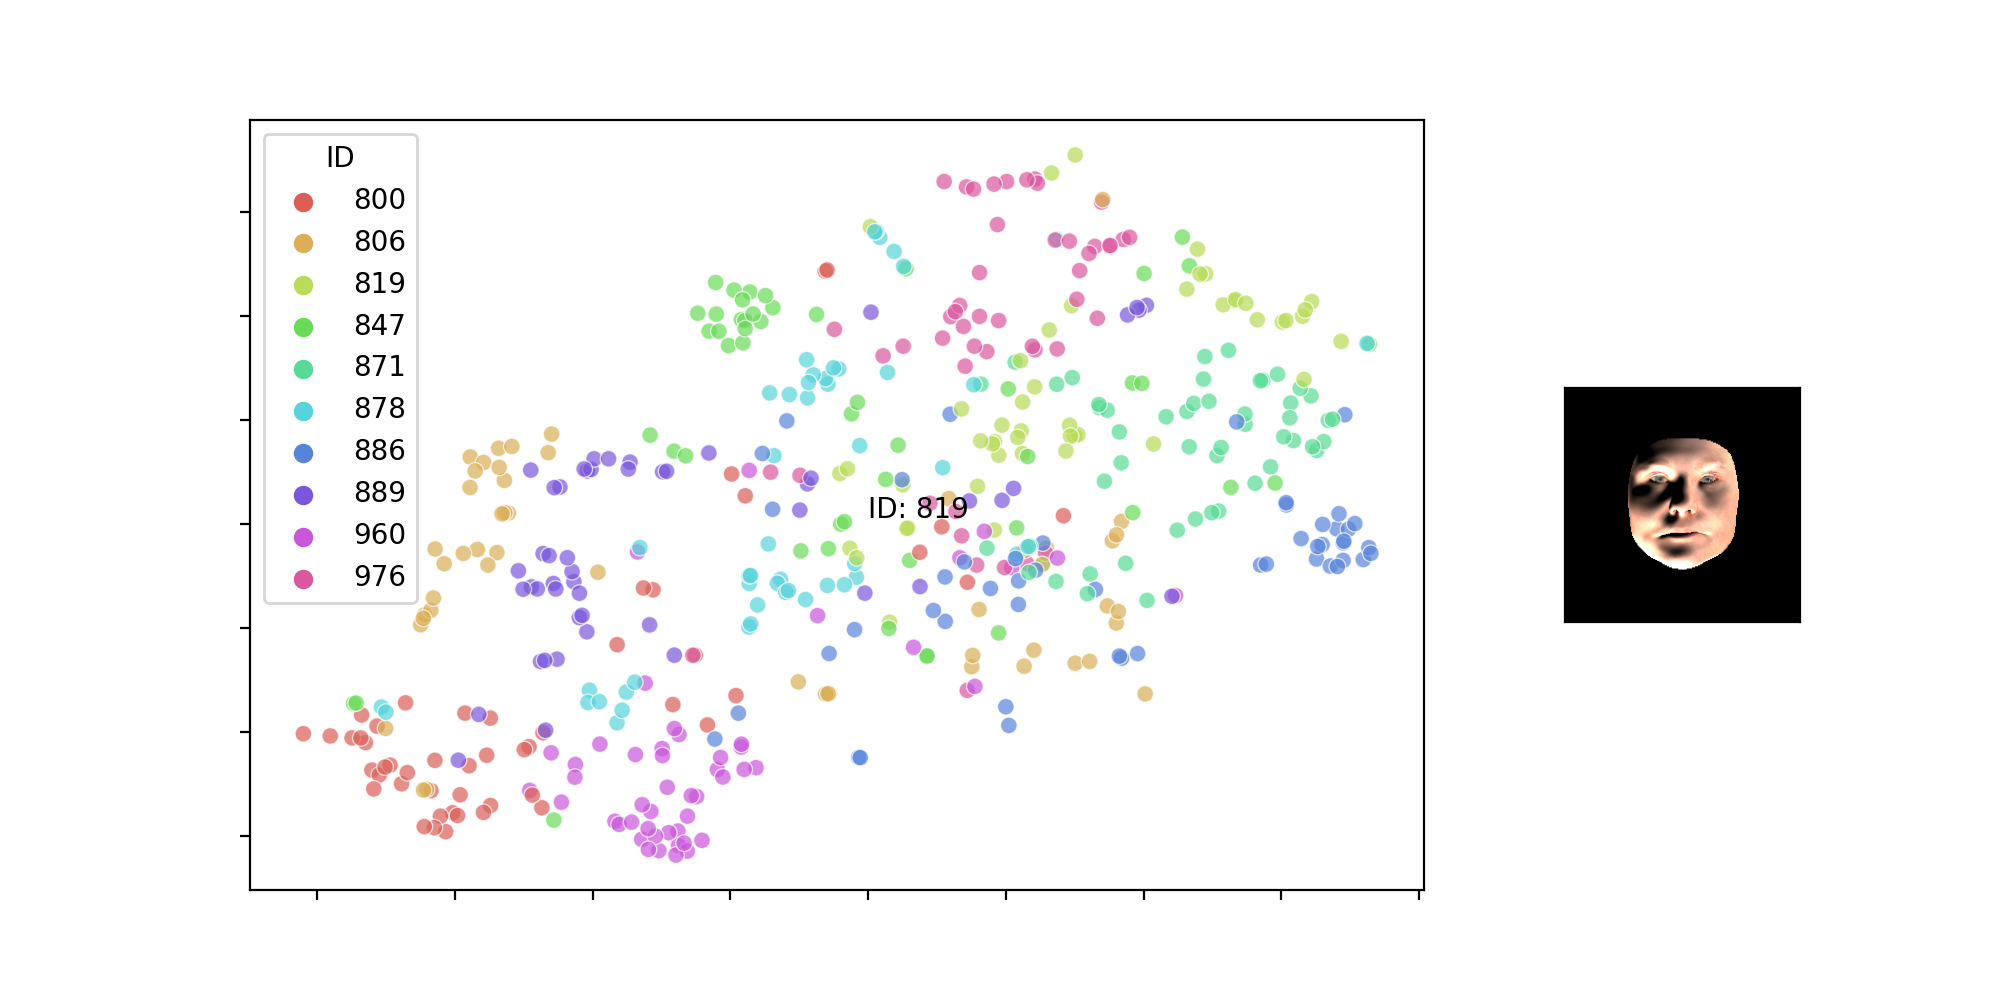

In [7]:
%matplotlib notebook

plt.close('all')

fig = plt.figure(figsize=(10, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

x = np.array(emb_df["emb1"])
y = np.array(emb_df["emb2"])
filepaths = np.array(emb_df["filename"])
num_classes = len(set(emb_df["id"]))

emb_df["ID"] = emb_df["id"]
g = sns.scatterplot(
    x="emb1", y="emb2",
    hue="ID",
    palette=sns.color_palette("hls", num_classes),
    data=emb_df,
    legend="full",
    alpha=0.7, 
    ax=ax1
)

g.set(xticklabels=[], yticklabels=[], xlabel=None, ylabel=None)
# plt.setp(g.get_legend().get_texts(), fontsize='18') # for legend text
# plt.setp(g.get_legend().get_title(), fontsize='18') # for legend title

text=ax1.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    ix, iy = event.xdata, event.ydata

    for i, current_ax in enumerate([ax1, ax2]):

        # For infomation, print which axes the click was in
        if current_ax == event.inaxes:
            ax = current_ax

    dx = 0.01 * (ax.get_xlim()[1] - ax.get_xlim()[0])
    dy = 0.01 * (ax.get_ylim()[1] - ax.get_ylim()[0])

    # Check for every point if the click was close enough:
    for i in range(len(x)):
        print("i")
        if(x[i] > ix-dx and x[i] < ix+dx and y[i] > iy-dy and y[i] < iy+dy):
            tx = "ID: " + str(emb_df["id"][i]) 
            text.set_text(tx)
            filepath = filepaths[i]
            print("filepath")
            image_data = imageio.imread(filepath).astype(np.float32)/255.
            plt.gca().axes.get_xaxis().set_ticks([])
            plt.gca().axes.get_yaxis().set_ticks([])
            ax2.imshow(image_data)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()